In [1]:
#load files
import glob


### Lendo os arquivos

Referência: https://stackoverflow.com/questions/35672809/how-to-read-a-list-of-txt-files-in-a-folder-in-python

In [2]:
#reading files
import glob
txt_files = glob.glob("transcript/*.txt") #pegando apenas os arquivos no formato txt dentro da pasta.


In [3]:
txt_files #lista com todos os arquivos nas pastas

['transcript/F2mp_download_instagram_mp3_320 (transcript).txt',
 'transcript/F2mp_download_instagram_mp3_320-10 (transcript).txt',
 'transcript/F2mp_download_instagram_mp3_320-11 (transcript).txt',
 'transcript/F2mp_download_instagram_mp3_320-2 (transcript).txt',
 'transcript/F2mp_download_instagram_mp3_320-3 (transcript).txt',
 'transcript/F2mp_download_instagram_mp3_320-4 (transcript).txt',
 'transcript/F2mp_download_instagram_mp3_320-5 (transcript).txt',
 'transcript/F2mp_download_instagram_mp3_320-6 (transcript).txt',
 'transcript/F2mp_download_instagram_mp3_320-7 (transcript).txt',
 'transcript/F2mp_download_instagram_mp3_320-8 (transcript).txt',
 'transcript/F2mp_download_instagram_mp3_320-9 (transcript).txt']

In [4]:
def read_lines(file):
    """função para ler todos os arquivos. Ele retornar uma tupla: (nome, texto)"""
    with open(file) as file:
        while (line := file.readline().rstrip()):
            data = (file.name, line)
    return data

In [5]:
output_dict = map(read_lines, txt_files) #lendo todos os arquivos

In [6]:
data = list(output_dict) #retirando do mapping e transformando em lista

### Construindo a Worldclaoud

Referência: https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb

In [7]:
#for importing data and wrangling
import pandas as pd
import numpy as np

#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [8]:
# read in the data
df = pd.DataFrame(data, columns=['file_name', 'text'])

In [9]:
text = ' '.join(df.text.tolist()).lower()

In [10]:
stopwords = set(STOPWORDS)

In [11]:
stopwords.update(["que", "uma", "de", "ou", "o", "na", "um", "e", "é", "não", "mas", "mais", "aqui", "eh", "dos", "lá", "aí", "bem"])

In [54]:
wordcloud = WordCloud(stopwords = stopwords,
                        min_word_length=3,
                      collocations=True, width=1600, height=800).generate(text)

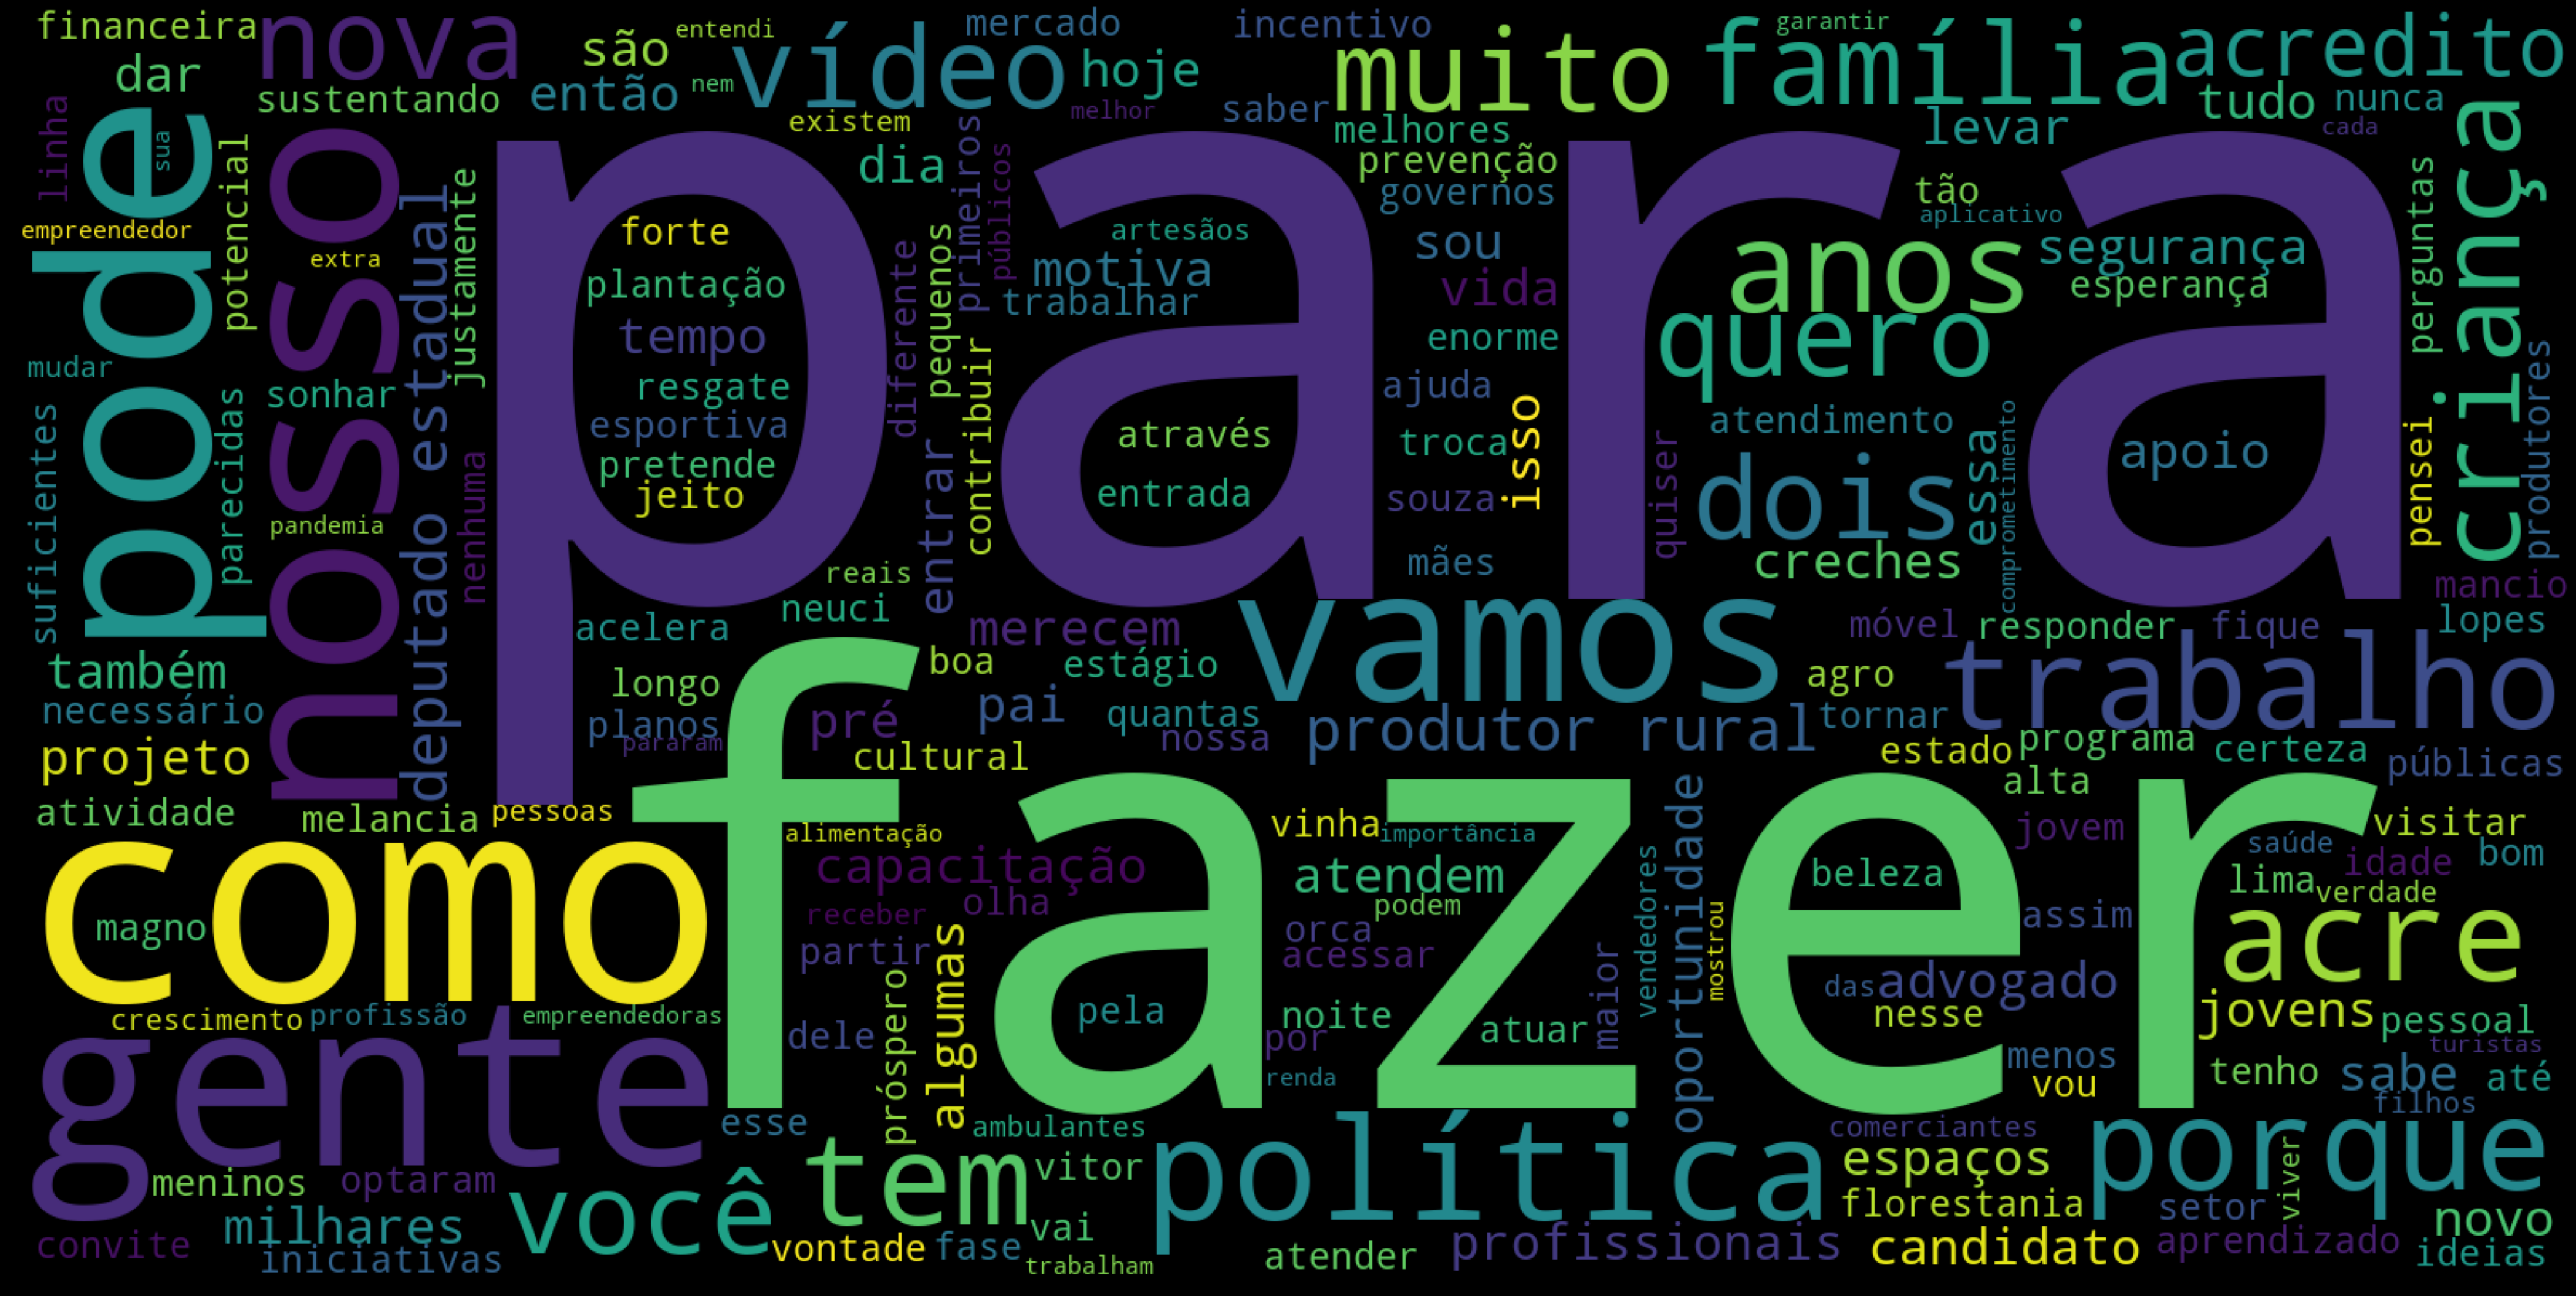

In [55]:
plt.figure( figsize=(80,40), facecolor='k')
plt.imshow(wordcloud)

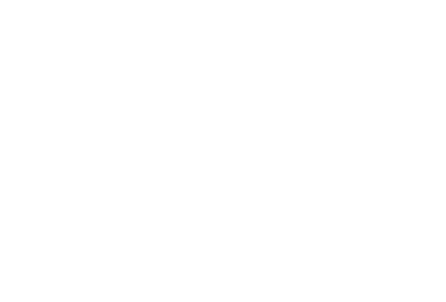

In [56]:
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [57]:
wordcloud.to_file("wordcloud.png")

### Plotar as palavras no mapa do Acre

In [15]:
# open the image and use np.array to transform the file to an array
cand_mask=np.array(Image.open('mapa-acre.jpg'))

# this line will take all values greater than 3 and make them 255 (white)
# if they are less than 3, they will be whatever value they are in the array
cand_mask=np.where(cand_mask > 3, 255, cand_mask)

In [50]:
#create and generate our wordcloud object
wordcloud = WordCloud(stopwords = stopwords,
                      width=1600, height=800,
                      min_word_length=5,
                      
                      background_color='white',
                      # contour_color='red',
                      mask=cand_mask, 
                      # colormap='Blues',
            ).generate(text)

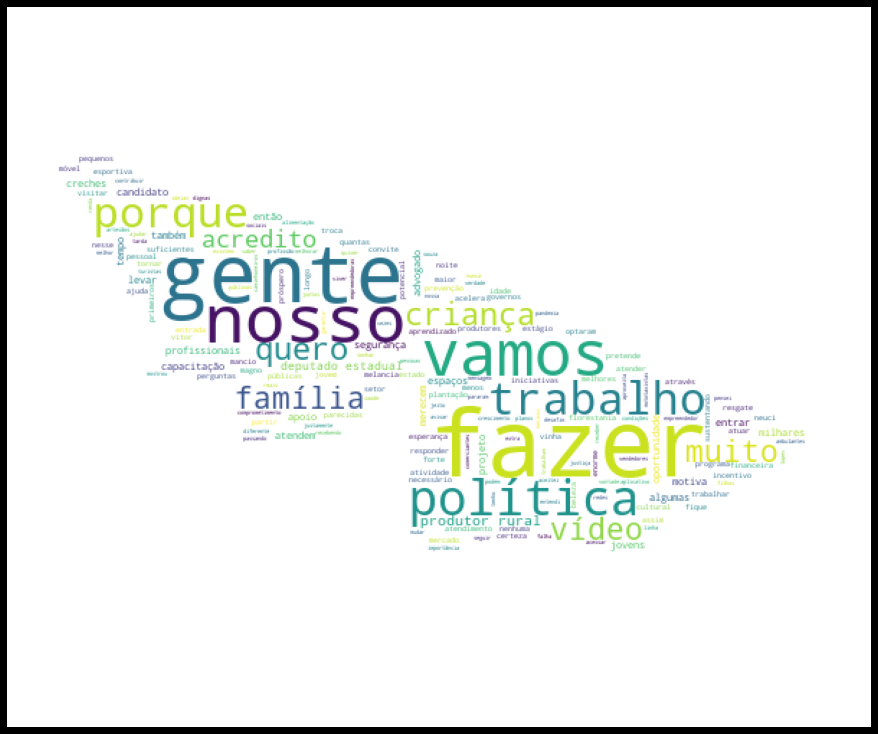

In [51]:
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [53]:
wordcloud.to_file("acre.png")